In [11]:
import numpy as np


In [9]:
import pandas as pd


In [12]:
np.random.seed(42)  #provides random number


In [57]:
apartments=[f"Apt_{i}"for i in range(1,21)]

In [53]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [54]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}



In [55]:
data

{'Date': array(['2025-07-01T00:00:00.000000000', '2025-07-02T00:00:00.000000000',
        '2025-07-03T00:00:00.000000000', '2025-07-04T00:00:00.000000000',
        '2025-07-05T00:00:00.000000000', '2025-07-06T00:00:00.000000000',
        '2025-07-07T00:00:00.000000000', '2025-07-08T00:00:00.000000000',
        '2025-07-09T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
        '2025-07-11T00:00:00.000000000', '2025-07-12T00:00:00.000000000',
        '2025-07-13T00:00:00.000000000', '2025-07-14T00:00:00.000000000',
        '2025-07-15T00:00:00.000000000', '2025-07-16T00:00:00.000000000',
        '2025-07-17T00:00:00.000000000', '2025-07-18T00:00:00.000000000',
        '2025-07-19T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
        '2025-07-21T00:00:00.000000000', '2025-07-22T00:00:00.000000000',
        '2025-07-23T00:00:00.000000000', '2025-07-24T00:00:00.000000000',
        '2025-07-25T00:00:00.000000000', '2025-07-26T00:00:00.000000000',
        '2025-07-27T00:00:00.0

In [59]:
df=pd.DataFrame(data)
display(df.head())

ValueError: All arrays must be of the same length

In [39]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_(i),22.48
1,2025-07-02,Apt_(i),19.31
2,2025-07-03,Apt_(i),23.24
3,2025-07-04,Apt_(i),27.62
4,2025-07-05,Apt_(i),18.83
...,...,...,...
595,2025-07-26,Apt_(i),17.45
596,2025-07-27,Apt_(i),18.65
597,2025-07-28,Apt_(i),15.11
598,2025-07-29,Apt_(i),17.78


In [20]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [40]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_(i),22.48
1,2025-07-02,Apt_(i),19.31
2,2025-07-03,Apt_(i),23.24
3,2025-07-04,Apt_(i),27.62
4,2025-07-05,Apt_(i),18.83
...,...,...,...
595,2025-07-26,Apt_(i),17.45
596,2025-07-27,Apt_(i),18.65
597,2025-07-28,Apt_(i),15.11
598,2025-07-29,Apt_(i),17.78


In [41]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [42]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071


In [43]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [44]:
#Total usage per apartments
usage_per_apartments=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartments)

Apartment
Apt_(i)    11959.5
Name: Electricity_usage, dtype: float64


In [45]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


In [47]:
import matplotlib.pyplot as plt


In [48]:
import seaborn as sns


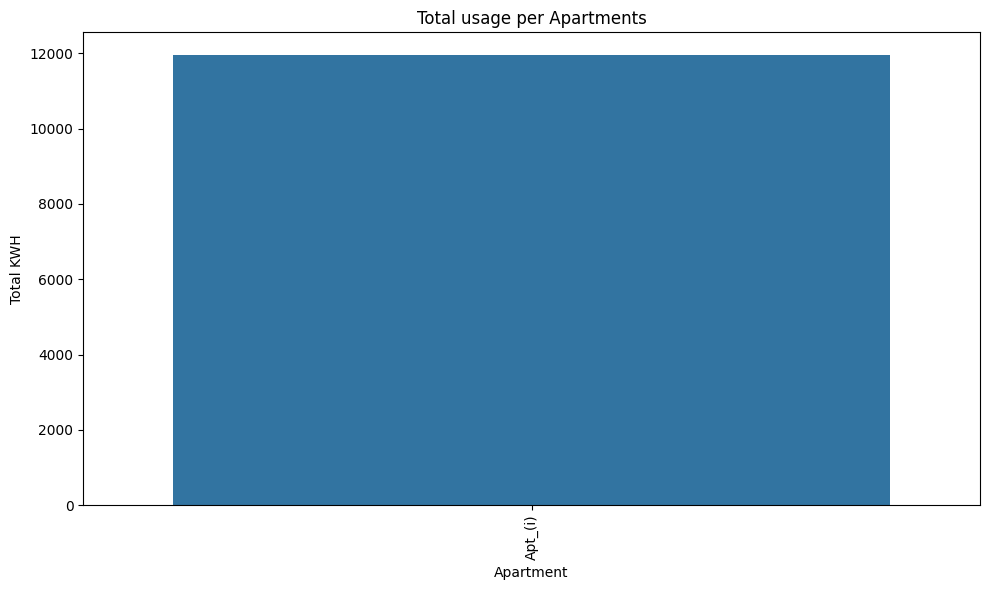

In [49]:
plt.figure (figsize=(10,6))
sns.barplot(x=usage_per_apartments.index,y=usage_per_apartments.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

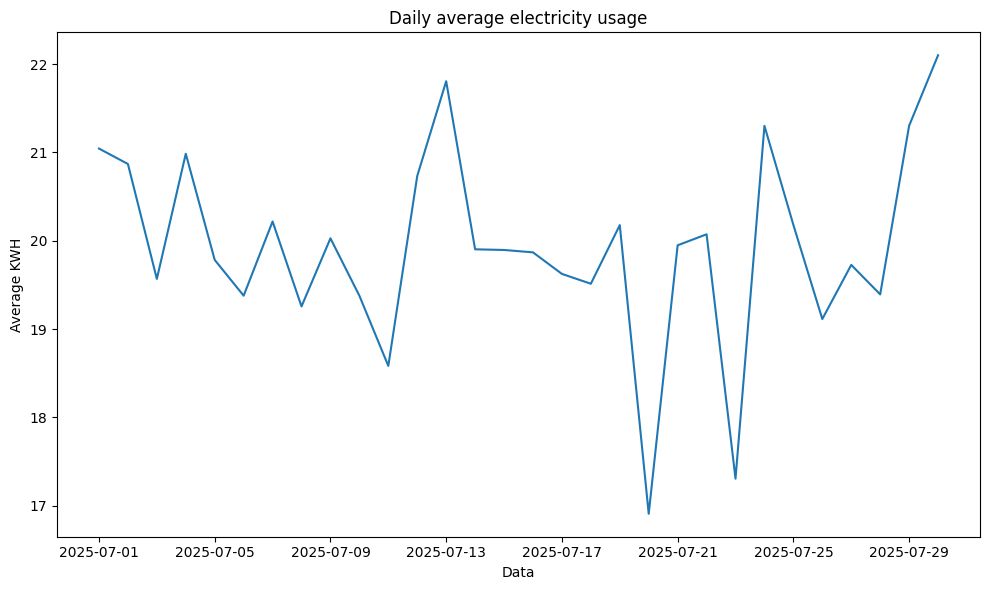

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-24   Apt_(i)              32.32             True
125 2025-07-06   Apt_(i)              30.95             True
179 2025-07-30   Apt_(i)              33.60             True
209 2025-07-30   Apt_(i)              39.26             True
220 2025-07-11   Apt_(i)              31.57             True


In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Data")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()
threshold= df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_Usage_flag"] = df["Electricity_usage"]>threshold
print(df[df["High_Usage_flag"] == True].head())